# 整然データ

pandasでデータを扱う際には整然データであることが望ましいです。本節では整然データの概要および、DataFrameを整然データに整形する方法を紹介します。

## 整然データとは

整然データ （Tidy Data）とは次の要件を満たすデータです。

1. 各変数が1つの列で構成されている
2. 各観測が1つの行で構成されている
3. 観測単位が1つの表で構成されている

> Wickham, Hadley (20 February 2013). "Tidy Data" https://www.jstatsoft.org/article/view/v059i10 Tidy Data in Python https://www.jeannicholashould.com/tidy-data-in-python.html

雑然データ（Messy Data）とは整然データの要件を満たさないデータです。整然データと雑然データの例として、1月1日から1月3日の各都市の平均気温データを扱います。

![整然データと雑然データ](./images/tidy_messy.png)

次のように、雑然データでは1つの列に日付と気温の2つの変数で構成されているのに対して、整然データでは各列が1つの変数で構成されているのが確認できます。

![列の構成](./images/columns.png)

次のように、雑然データでは各行が複数の日付で構成（観測単位が複数）されているのに対して、整然データでは各列が1つの観測で構成されているのが確認できます。

![行の構成](./images/row.png)

## 雑然データから整然データへの変換

ここでは次のような雑然データを整然データに変換する手順を解説します。

In [1]:
import datetime

import pandas as pd

wide_df = pd.DataFrame(
    [
        ["Tokyo", 5.8, 5.7, 5.6],
        ["Osaka", 6.8, 6.7, 6.6],
        ["Nagoya", 5.1, 5.1, 5.0],
    ],
    columns=["Location"] + pd.date_range("2020-01-01", periods=3).tolist(),
)
wide_df

Location  2020-01-01 00:00:00  2020-01-02 00:00:00  2020-01-03 00:00:00
0    Tokyo                  5.8                  5.7                  5.6
1    Osaka                  6.8                  6.7                  6.6
2   Nagoya                  5.1                  5.1                  5.0

DataFrameの ``melt`` メソッドを実行すると、整然データへの変換が行えます。次のような引数を渡します。

- id_vars: 基本となる列名を指定
- var_name: 変数となる列名を指定
- value_name: 値となる列名を指定

In [2]:
tidy_df = wide_df.melt(id_vars="Location", var_name="Date", value_name="Temperature")
tidy_df

Location       Date  Temperature
0    Tokyo 2020-01-01          5.8
1    Osaka 2020-01-01          6.8
2   Nagoya 2020-01-01          5.1
3    Tokyo 2020-01-02          5.7
4    Osaka 2020-01-02          6.7
5   Nagoya 2020-01-02          5.1
6    Tokyo 2020-01-03          5.6
7    Osaka 2020-01-03          6.6
8   Nagoya 2020-01-03          5.0

## 整然データを可視化

``tidy_df`` は整然データのDataFrameであるため、Plotly Expressに渡せます。次のコードでは整然データに変換したDataFrameをPlotly Expressを用いて棒グラフに描画しています。

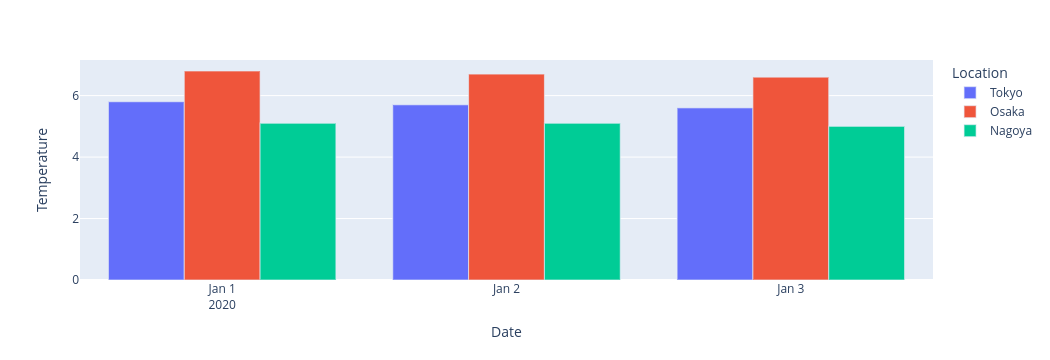

In [4]:
import plotly.express as px

px.bar(tidy_df, x="Date", y="Temperature", color="Location", barmode="group").show()